# Miranda and Fackler で出てくる補間法のまとめ

8, 9章で使われる補間法の簡単なまとめ

In [1]:
using BasisMatrices

In [2]:
using CompEcon

In [17]:
using Plots

以下は Miranda and Fackler で使われるオリジナルの関数

## fundefn(bastype, n, a, b, order)

### 補間の形式、始点と終点などの情報を要約してくれる

* bastypeには補間の形式をいれる。チェビチェフのノードを使う多項式補間なら:cheb、スプラインなら:spil、線形スプラインなら:linとする
* nは多項式補間の場合は補間の点の数、スプライン補間なら基底の関数の数
* aは補間の始点
* bは補間の終点
* orderはスプライン補間のときのみのオプションで、スプライン関数の次元

$n$ 個の点が与えられたとして、  
* 全ての点を通る $n-1$ 次関数による補間が多項式補間
* $n-1$ 個の区間に区分し、微分したときの連続性を保ちながら、各区間ごとに異なる $k$ 次関数で保管する補間法がスプライン補間  
  
課題1でやった線形補間は、1次のスプライン補間

## funfitf(fspace, f, additional parameter)

### fspaceで与えられた補間の情報をもとに、関数fの補間の係数を求める

* fspaceは前述のfundefnの結果で、どういった補間をするかという情報
* fは補間したい関数
* additional parameterは関数fに入れる未知数

これだけだと、既知の関数を補間するのでそれほど役に立たない

## funfitxy(fspace, x, y)

### fspaceで与えられた補間の情報をもとに、x, yで示された点の補間の係数を求める

* fspaceは同様
* xは既知の説明変数の値の行列
* yは上のxに対応する実現値

## funeval(c, fspace, x)

### どのような補間か決まり、その補間の係数が求められたのちに、xでの当てはめ値を返す
* c上のfunfitf,funfitxyで求めた係数
* fspaceはこれまでと同様
* xに入れた点で補間の当てはめ値を返す


## funeval(c, fspace, x, order)

### orderに入れられた数字の回数だけ補間の関数を微分し、その当てはめ値を返す

## funbas(fspace, x)

### fspaceからわかる基底関数のxでの当てはめ値を返す

## Julia での実装  
  
BasisMatrices.jl を使えば、以上の関数と同じことができる

真の関数が $f(x) = \exp{(-x)}$ だとして、多項式補間をしてみる

In [12]:
# function to approximate
f(x) = exp.(-x)

# Set the endpoints of approximation interval:
a =  -1                            # left endpoint
b =   1                            # right endpoint

# Choose an approximation scheme. In this case, let us use an order 10
# Chebychev approximation scheme:
n = 10                             # order of approximation
basis = Basis(ChebParams(n, a, b))      # define basis

1 dimensional Basis on the hypercube formed by (-1.0,) × (1.0,).
Basis families are Cheb


In [6]:
# Create nodes
xs = nodes(basis)

([-0.987688, -0.891007, -0.707107, -0.45399, -0.156434, 0.156434, 0.45399, 0.707107, 0.891007, 0.987688], Array{Float64,1}[[-0.987688, -0.891007, -0.707107, -0.45399, -0.156434, 0.156434, 0.45399, 0.707107, 0.891007, 0.987688]])

In [10]:
Φ = BasisMatrix(basis, Expanded(), xs[1], 0)

BasisMatrix{BasisMatrices.Expanded} of order [0]

In [24]:
# Actual function at interpolation nodes
y = f(xs[1]);

Φ の val というフィールドに基底関数が作られている。それらの基底関数の係数を求めれば、補間が完了する。  
従って、$f(x) = \phi c$ という線形方程式を解いて c の値を求める

In [16]:
# Get coefficients
c = Φ.vals[1] \ y;

In [21]:
x_grid = linspace(-1, 1, 100)
yf = f(x_grid)
yeval = funeval(c, basis, x_grid);


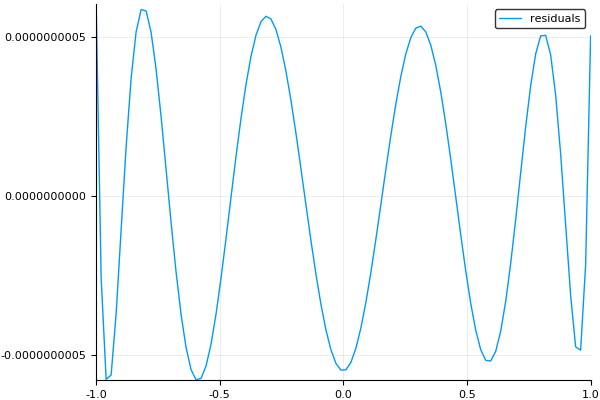

In [23]:
plot(x_grid, yf - yeval, label = "residuals")

多変数の関数の場合は、`BasisMatrices.jl` の Example を参照してください